## CNN 

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten 
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras import regularizers
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from keras.preprocessing import image 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
import pickle
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score


Using plaidml.keras.backend backend.


In [2]:
def get_image_value(path): 
    img = image.load_img(path, target_size = (224,224,3))
    img = image.img_to_array(img)
    return img/255

In [3]:
def get_conv_model_normal():
    
    inp_shape = (224,224,3)
    act = 'relu'
    drop = .5 
    kernal_reg = regularizers.l1(.001)
    dil_rate = 2
    
    
    model = Sequential() 
    
    model.add(Conv2D(64, kernel_size=(3,3),activation=act, input_shape = inp_shape, 
                     kernel_regularizer = kernal_reg,
                     kernel_initializer = 'he_uniform',  padding = 'same', name = 'Input_Layer'))
    model.add(Dense(64, activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2, 2),  strides = (2,2)))
    
    
    model.add(Conv2D(64, (3, 3), activation=act, kernel_regularizer = kernal_reg, dilation_rate = dil_rate, 
                     kernel_initializer = 'he_uniform',padding = 'same'))
    model.add(Dense(64, activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides = (2,2)))
    

    
    model.add(Conv2D(128, (3, 3), activation=act, kernel_regularizer = kernal_reg, dilation_rate = dil_rate, 
                     kernel_initializer = 'he_uniform',padding = 'same'))
    model.add(Conv2D(128, (3, 3), activation=act, kernel_regularizer = kernal_reg, dilation_rate = dil_rate, 
                     kernel_initializer = 'he_uniform',padding = 'same'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides = (2,2)))

    
    model.add(Flatten())

    
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))


    model.add(Dropout(drop))

    model.add(Dense(1, activation='sigmoid', name = 'Output_Layer'))
    
    model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    return model 


In [4]:
train_type = 'Normal'

def get_samples_norm(): 
    x_train = pickle.load(open(f'../Pickles/x_train.p', 'rb'))
    x_test = pickle.load(open(f'../Pickles/x_test.p', 'rb'))
    y_train = pickle.load(open(f'../Pickles/y_train.p', 'rb'))
    y_test = pickle.load(open(f'../Pickles/y_test.p', 'rb'))
    return x_train, x_test, y_train, y_test
x_train, x_test, y_train, y_test = get_samples_norm()


In [5]:
type(y_test)

pandas.core.frame.DataFrame

In [6]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
augmentation =ImageDataGenerator(rotation_range = 15, width_shift_range = .1, height_shift_range = .1, 
                                                           horizontal_flip = True, fill_mode = 'nearest')
augmentation.fit(x_train)


early_stopping = EarlyStopping(monitor='val_loss', verbose = 1, patience=10, min_delta = .002)
model_checkpoint = ModelCheckpoint('models/CNN-ModelCheckpointWeights.h5', verbose = 1, save_best_only=True,
                                  monitor = 'val_loss')
lr_plat = ReduceLROnPlateau(patience = 3, mode = 'min')
epochs = 50
batch_size = 16
normal_model = get_conv_model_normal()
normal_history = normal_model.fit_generator(augmentation.flow(x_train, y_train, batch_size = batch_size),
                epochs = epochs, 
         callbacks = [early_stopping, model_checkpoint, lr_plat], validation_data = (x_test, y_test), verbose= 1)


INFO:plaidml:Opening device "opencl_amd_ellesmere.0"


Epoch 1/50
11/11 [==============================] - 31s 3s/step - loss: 11.6194 - acc: 0.6532 - val_loss: 10.2057 - val_acc: 0.6364

Epoch 00001: val_loss improved from inf to 10.20570, saving model to models/CNN-ModelCheckpointWeights.h5
Epoch 2/50
11/11 [==============================] - 7s 639ms/step - loss: 9.4701 - acc: 0.6953 - val_loss: 8.5919 - val_acc: 0.7273

Epoch 00002: val_loss improved from 10.20570 to 8.59193, saving model to models/CNN-ModelCheckpointWeights.h5
Epoch 3/50
11/11 [==============================] - 4s 318ms/step - loss: 7.9223 - acc: 0.6554 - val_loss: 7.1400 - val_acc: 0.7273

Epoch 00003: val_loss improved from 8.59193 to 7.14000, saving model to models/CNN-ModelCheckpointWeights.h5
Epoch 4/50
11/11 [==============================] - 4s 319ms/step - loss: 6.6066 - acc: 0.6795 - val_loss: 5.9572 - val_acc: 0.6591

Epoch 00004: val_loss improved from 7.14000 to 5.95718, saving model to models/CNN-ModelCheckpointWeights.h5
Epoch 5/50
11/11 [================

11/11 [==============================] - 3s 317ms/step - loss: 1.0264 - acc: 0.8730 - val_loss: 1.0691 - val_acc: 0.8864

Epoch 00036: val_loss did not improve from 0.99514
Epoch 37/50
11/11 [==============================] - 3s 317ms/step - loss: 0.9845 - acc: 0.8827 - val_loss: 0.9428 - val_acc: 0.9091

Epoch 00037: val_loss improved from 0.99514 to 0.94277, saving model to models/CNN-ModelCheckpointWeights.h5
Epoch 38/50
11/11 [==============================] - 3s 318ms/step - loss: 0.9851 - acc: 0.8923 - val_loss: 0.9502 - val_acc: 0.9091

Epoch 00038: val_loss did not improve from 0.94277
Epoch 39/50
11/11 [==============================] - 3s 317ms/step - loss: 0.8971 - acc: 0.9146 - val_loss: 0.9711 - val_acc: 0.8864

Epoch 00039: val_loss did not improve from 0.94277
Epoch 40/50
11/11 [==============================] - 3s 318ms/step - loss: 0.9272 - acc: 0.9203 - val_loss: 0.9450 - val_acc: 0.8864

Epoch 00040: val_loss did not improve from 0.94277
Epoch 41/50
11/11 [==========

In [7]:
print(normal_model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_Layer (Conv2D)         (None, 224, 224, 64)      1792      
_________________________________________________________________
dense_1 (Dense)              (None, 224, 224, 64)      4160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      36928     
_________________________________________________________________
dense_2 (Dense)              (None, 112, 112, 64)      4160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 128)       73856     
__________

## Loss & Accuracy

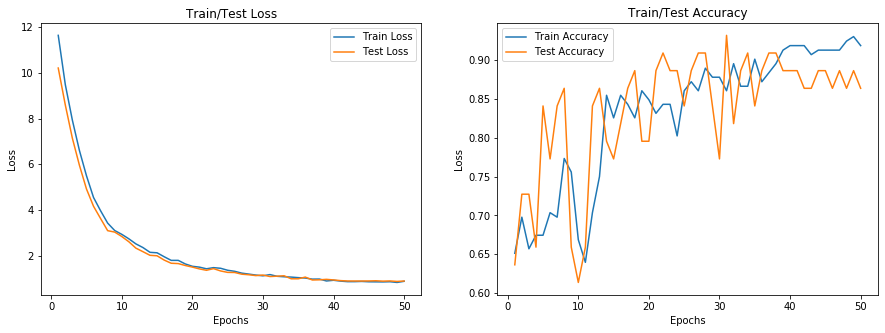

In [8]:
train_loss = normal_history.history['loss']
train_acc = normal_history.history['acc']
test_loss = normal_history.history['val_loss']
test_acc = normal_history.history['val_acc']
epochs = [i for i in range(1, len(test_acc)+1)]

fig, ax = plt.subplots(1,2, figsize = (15,5))
ax[0].plot(epochs, train_loss, label = 'Train Loss')
ax[0].plot(epochs, test_loss, label = 'Test Loss')
ax[0].set_title('Train/Test Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend()

ax[1].plot(epochs, train_acc, label = 'Train Accuracy')
ax[1].plot(epochs, test_acc, label = 'Test Accuracy')
ax[1].set_title('Train/Test Accuracy')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend()

In [9]:
y_test.shape

(44, 1)

### AUC and ROC Curves

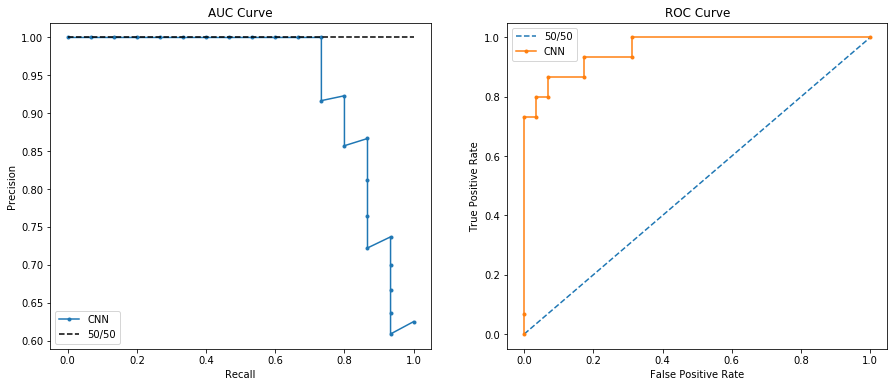

,F1 Score,AUC,ROC
0,0.828,0.942,0.961


In [10]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, f1_score, auc
normal_model = get_conv_model_normal()
normal_model.load_weights('models/CNN-ModelCheckpointWeights.h5') #load the best weights before overfitting
 

fig, ax = plt.subplots(1,2, figsize = (15,6))
#AUC CURVE
y_test_prob = normal_model.predict(x_test)

y_test_precision, y_test_recall, spec = precision_recall_curve(y_test, y_test_prob)
y_test_predict = np.where(y_test_prob >= .5, 1, 0).ravel()
y_test_f1= f1_score(y_test, y_test_predict)
y_test_auc = auc(y_test_recall, y_test_precision)
no_skill = len(y_test[y_test==1]) / len(y_test)
ax[0].plot(y_test_recall, y_test_precision, marker='.', label='CNN')
ax[0].plot([0, 1], [no_skill, no_skill], linestyle='--', label='50/50', color = 'Black')
ax[0].set_xlabel('Recall')
ax[0].set_ylabel('Precision')
ax[0].set_title(f'AUC Curve')
ax[0].legend()

#ROC CURVE
ns_probs = [0 for i in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
y_test_roc = roc_auc_score(y_test, y_test_prob)

ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
y_test_fpr, y_test_tpr, threshold = roc_curve(y_test, y_test_prob)
ax[1].plot(ns_fpr, ns_tpr, linestyle='--', label='50/50')
ax[1].plot(y_test_fpr, y_test_tpr, marker='.', label='CNN')
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_title(f'ROC Curve')
ax[1].legend()
plt.show()

pd.DataFrame({'F1 Score': round(y_test_f1, 3), 'AUC': round(y_test_auc, 3), 'ROC':round(y_test_roc, 3)}, index = [0])

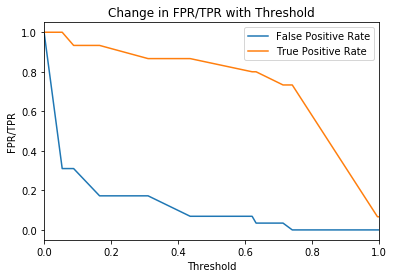

In [11]:
df = pd.DataFrame({'Threshold': threshold, 'FPR': y_test_fpr, 'TPR': y_test_tpr})
plt.plot(df.Threshold, df.FPR, label = 'False Positive Rate')
plt.plot(df.Threshold, df.TPR, label = 'True Positive Rate')
plt.xlabel('Threshold')
plt.ylabel('FPR/TPR')
plt.title('Change in FPR/TPR with Threshold')
plt.xlim(0, 1)
plt.legend()
plt.show()

### Confusion Matrix

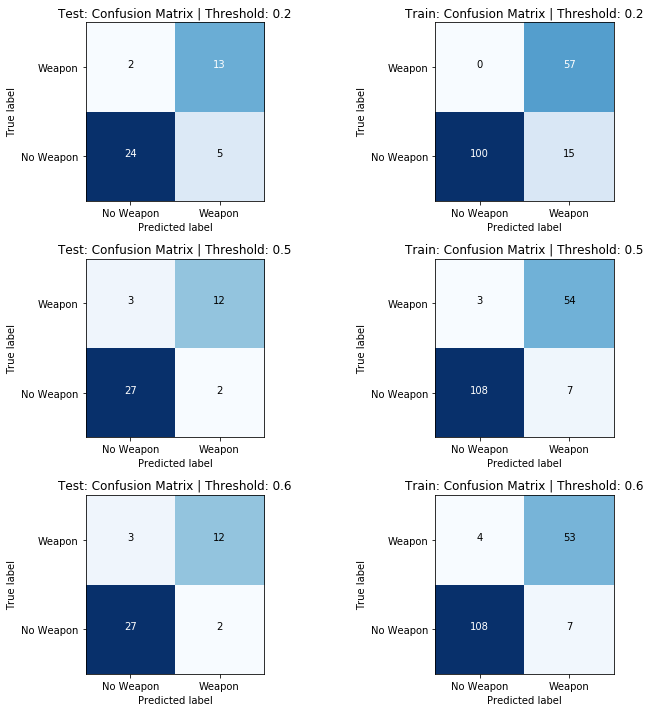

In [12]:
import itertools
import seaborn as sns
def plot_confusion_matrix(y_test,y_train, y_train_prob, y_test_prob,thresholds, classes,
                          cmap=plt.cm.Blues):
    fig, ax = plt.subplots(len(thresholds),2, figsize = (10,10))

    for idx, thresh in enumerate(thresholds):
        y_test_predict = np.where(y_test_prob >= thresh, 1, 0)
        y_train_predict = np.where(y_train_prob >= thresh, 1, 0)
        train_cm = confusion_matrix(y_train, y_train_predict) 
        test_cm = confusion_matrix(y_test, y_test_predict)
        
        #test confusion
        ax[idx, 0].imshow(test_cm,  cmap=plt.cm.Blues) 

        ax[idx, 0].set_title(f'Test: Confusion Matrix | Threshold: {thresh}')
        ax[idx, 0].set_ylabel('True label')
        ax[idx, 0].set_xlabel('Predicted label')

        class_names = classes 
        tick_marks = np.arange(len(class_names))
        ax[idx, 0].set_xticks(tick_marks)
        ax[idx,0].set_xticklabels(class_names)
        ax[idx, 0].set_yticks(tick_marks)
        ax[idx, 0].set_yticklabels(class_names)

        th = test_cm.max() / 2. 

        for i, j in itertools.product(range(test_cm.shape[0]), range(test_cm.shape[1])):
                ax[idx, 0].text(j, i, f'{test_cm[i, j]}',# | {int(round(test_cm[i,j]/test_cm.ravel().sum(),5)*100)}%',
                         horizontalalignment='center',
                         color='white' if test_cm[i, j] > th else 'black')
        ax[idx, 0].set_ylim([-.5,1.5])
        
        #TRAIN CONFUSION
        ax[idx, 1].imshow(train_cm,  cmap=plt.cm.Blues) 

        ax[idx, 1].set_title(f'Train: Confusion Matrix | Threshold: {thresh}')
        ax[idx, 1].set_ylabel('True label')
        ax[idx, 1].set_xlabel('Predicted label')

        class_names = classes 
        tick_marks = np.arange(len(class_names))
        ax[idx, 1].set_xticks(tick_marks)
        ax[idx,1].set_xticklabels(class_names)
        ax[idx, 1].set_yticks(tick_marks)
        ax[idx, 1].set_yticklabels(class_names)


        th = train_cm.max() / 2. 

        for i, j in itertools.product(range(train_cm.shape[0]), range(train_cm.shape[1])):
                ax[idx, 1].text(j, i, f'{train_cm[i, j]}',# | {int(round(train_cm[i,j]/train_cm.ravel().sum(),5)*100)}%',
                         horizontalalignment='center',
                         color='white' if train_cm[i, j] > th else 'black')
        ax[idx, 1].set_ylim([-.5,1.5])
    plt.tight_layout()
 
    plt.show()
    
normal_model = get_conv_model_normal()
normal_model.load_weights('models/CNN-ModelCheckpointWeights.h5') #load the best weights before overfitting

y_test_prob = normal_model.predict(x_test).ravel()

y_train_prob = normal_model.predict(x_train).ravel()

plot_confusion_matrix(y_train = y_train, y_test = y_test, y_train_prob = y_train_prob,
                      y_test_prob = y_test_prob,classes = ['No Weapon', 'Weapon'], thresholds = [.2, .5,.6])

#### Test on Google Data


In [13]:
import cv2

In [76]:
normal_model = get_conv_model_normal()
normal_model.load_weights('models/CNN-ModelCheckpointWeights.h5')
img = cv2.imread('../test2.jpg')
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
ss.setBaseImage(img)
ss.switchToSelectiveSearchFast()
rects = ss.process() 

windows = []
locations = []
for x, y, w,h in rects: 
    startx = x 
    starty = y 
    endx = x+w 
    endy = y+h 
    roi = img[starty:endy, startx:endx]
    roi = cv2.resize(roi, dsize = (224,224), interpolation = cv2.INTER_CUBIC)
    windows.append(roi)
    locations.append((startx, starty, endx, endy))
    


In [77]:
windows = np.array(windows)

predictions = normal_model.predict(windows)

In [78]:
clone = img.copy()
new_loc = [] 
new_prob = [] 
for idx, i in enumerate(predictions): 
    if i < .5: 
        continue
    startx, starty, endx, endy = locations[idx]
    cv2.rectangle(clone, (startx, starty), (endx, endy),  (0,255,0),2)
    text = f'Weapon: {i*100}'
    cv2.putText(clone, text, (startx, y), cv2.FONT_HERSHEY_SIMPLEX, .45, (0,255,0),2)
    new_loc.append(locations[idx])
    new_prob.append(i[0])
    
    

In [37]:
cv2.imshow('test', clone)
cv2.waitKey(0)

-1

In [79]:
# import the necessary packages
def non_max_suppression(boxes, probs, overlapThresh=0.3):
    # if there are no boxes, return an empty list
    if len(boxes) == 0:
        return []

    # if the bounding boxes are integers, convert them to floats -- this
    # is important since we'll be doing a bunch of divisions
    if boxes.dtype.kind == "i":
        boxes = boxes.astype("float")

    # initialize the list of picked indexes
    pick = []

    # grab the coordinates of the bounding boxes
    x1 = boxes[:, 0]
    y1 = boxes[:, 1]
    x2 = boxes[:, 2]
    y2 = boxes[:, 3]

    # compute the area of the bounding boxes and grab the indexes to sort
    # (in the case that no probabilities are provided, simply sort on the
    # bottom-left y-coordinate)
    area = (x2 - x1 + 1) * (y2 - y1 + 1)
    idxs = y2

    # if probabilities are provided, sort on them instead
    if probs is not None:
        idxs = probs

    # sort the indexes
    idxs = np.argsort(idxs)
    print(idxs)
    # keep looping while some indexes still remain in the indexes list
    while len(idxs) > 0:
        # grab the last index in the indexes list and add the index value
        # to the list of picked indexes
        last = len(idxs) - 1
        i = idxs[last]
        pick.append(i)

        # find the largest (x, y) coordinates for the start of the bounding
        # box and the smallest (x, y) coordinates for the end of the bounding
        # box
        xx1 = np.maximum(x1[i], x1[idxs[:last]])
        yy1 = np.maximum(y1[i], y1[idxs[:last]])
        xx2 = np.minimum(x2[i], x2[idxs[:last]])
        yy2 = np.minimum(y2[i], y2[idxs[:last]])

        # compute the width and height of the bounding box
        w = np.maximum(0, xx2 - xx1 + 1)
        h = np.maximum(0, yy2 - yy1 + 1)

        # compute the ratio of overlap
        overlap = (w * h) / area[idxs[:last]]

        # delete all indexes from the index list that have overlap greater
        # than the provided overlap threshold
        idxs = np.delete(idxs, np.concatenate(([last],
            np.where(overlap > overlapThresh)[0])))

    # return the indexes of only the bounding boxes to keep
    return pick

In [80]:
boxids = non_max_suppression(np.array(new_loc), np.array(new_prob))[0]
boxids

[170 207  33  43 168 608 142  12 736 278 205 804 383 479 471 121  14  17
 239 660 216 374 199 452 455 462 188 208  30 581 375  11 555 214 293 783
  51 249 116 659 605 606 607 673 609 611 604 612 613 614 615 672 671 616
 617 610 674 602 618 583 584 585 586 587 588 589 590 675 603 591 593 594
 595 596 597 598 599 600 601 592 619 621 658 644 667 645 666 646 665 664
 647 648 663 649 650 651 652 662 653 654 655 661 656 657 643 620 642 641
 622 670 623 624 625 626 627 628 629 630 631 669 632 582 634 635 636 637
 638 639 640 668 633   0 579 498 499 500 501 502 503 504 505 506 507 508
 497 509 511 512 513 514 515 516 517 518 519 520 521 510 522 496 494 468
 469 470 472 473 474 475 476 477 478 480 495 481 483 484 485 486 487 488
 489 490 491 492 493 482 523 524 525 556 557 558 559 560 561 562 563 564
 565 566 554 567 569 570 571 676 572 573 574 575 576 577 578 568 553 552
 551 526 527 528 529 530 531 532 533 534 535 536 537 538 539 540 541 542
 543 544 545 546 547 548 549 550 580 677 688 679 82

901

In [81]:
clone = img.copy()
  
startx, starty, endx, endy = new_loc[434]
cv2.rectangle(clone, (startx, starty), (endx, endy),  (0,255,0),2)
text = f'Weapon: {i*100}'
cv2.putText(clone, text, (startx, y), cv2.FONT_HERSHEY_SIMPLEX, .45, (0,255,0),2)
cv2.imshow('test', clone)
cv2.waitKey(0)

-1